In [1]:
import numpy as np

from net import Net
from matplotlib import pyplot as plt
from matplotlib import colors as clrs

[Taichi] version 1.8.0, llvm 15.0.1, commit 0da68467, win, python 3.10.11
[Taichi] Starting on arch=cuda


In [2]:
net = Net(
    input_layer=Net.Layers.Input(size=(64, 64, 3)),
    conv_topology=[
        Net.Layers.Conv(Net.Kernel(32, (7, 7), stride=2, padding=3)),
        Net.Layers.Conv(Net.Kernel(32, (3, 3), stride=1, padding=1), max_pool=(2, 2)),
        Net.Layers.Conv(Net.Kernel(64, (5, 5), stride=1, padding=2), max_pool=(2, 2)),
        Net.Layers.Conv(Net.Kernel(64, (3, 3), stride=1, padding=1)),
        Net.Layers.Conv(Net.Kernel(128, (5, 5), stride=2, padding=2)),
        Net.Layers.Conv(Net.Kernel(128, (3, 3), stride=1, padding=1)),
        Net.Layers.Conv(Net.Kernel(256, (3, 3), stride=2, padding=1), max_pool=(2, 2)),
        Net.Layers.Conv(Net.Kernel(512, (3, 3), stride=1, padding=1)),
        Net.Layers.Conv(Net.Kernel(512, (3, 3), stride=1, padding=1)),
        Net.Layers.Conv(Net.Kernel(512, (3, 3), stride=1, padding=1)),
    ],
    dense_topology=[
        Net.Layers.Dense(neurons_num=256),
        Net.Layers.Dense(neurons_num=128),
        Net.Layers.Dense(neurons_num=10)
    ]
)

In [3]:
net.summary()

+----------+--------------+--------------+-------------------+
|  Layer   | Input Shape  | Output Shape | Parameters Number |
+----------+--------------+--------------+-------------------+
| Conv__1  | (64, 64, 3)  | (32, 32, 32) |       4736        |
| Conv__2  | (32, 32, 32) | (16, 16, 32) |       9248        |
| Conv__3  | (16, 16, 32) |  (8, 8, 64)  |       51264       |
| Conv__4  |  (8, 8, 64)  |  (8, 8, 64)  |       36928       |
| Conv__5  |  (8, 8, 64)  | (4, 4, 128)  |      204928       |
| Conv__6  | (4, 4, 128)  | (4, 4, 128)  |      147584       |
| Conv__7  | (4, 4, 128)  | (1, 1, 256)  |      295168       |
| Conv__8  | (1, 1, 256)  | (1, 1, 512)  |      1180160      |
| Conv__9  | (1, 1, 512)  | (1, 1, 512)  |      2359808      |
| Conv__10 | (1, 1, 512)  | (1, 1, 512)  |      2359808      |
| Dense_1  |    (512,)    |    (256,)    |      131328       |
| Dense_2  |    (256,)    |    (128,)    |       32896       |
| Dense_3  |    (128,)    |    (10,)     |       1290  

Training progress: 100%|██████████| 60000/60000 [2:30:09<00:00,  6.66epochs/s, loss: 1.105, val_loss: 1.656]  


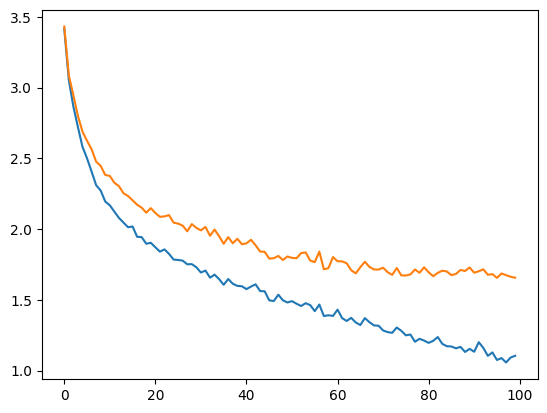

In [4]:
history = net.train(train_ds_url='dataset/training',
                    val_ds_url='dataset/validation',
                    epochs=60000,
                    batch_size=32,
                    history_interval=600,
                    learn_rate=.05,
                    l1_lambda=0.2,
                    l2_lambda=0.4,
                    grad_threshold=8.0,
                    auto_dump=True,
                    dump_interval=10000,
                    dump_url='wnet.model')

plt.plot(history)
plt.show()

Validation progress: 100%|██████████| 10/10 [00:05<00:00,  1.97classes/s]


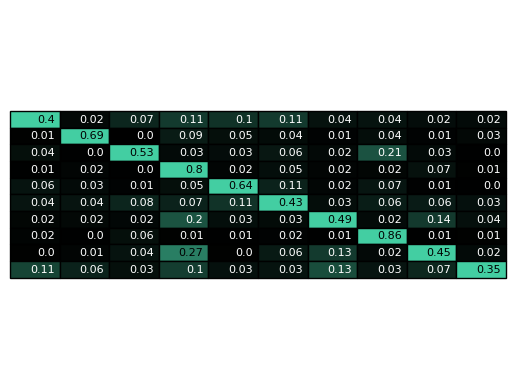

In [6]:
pm = net.compute_preds_matrix('dataset/validation')

fig, ax = plt.subplots()
ax.set_axis_off()

table = ax.table(cellText=np.round(pm, 2),
                    cellColours=np.full_like(pm, 'w', dtype=object),
                    loc='center')

cmap = clrs.LinearSegmentedColormap.from_list('Custom', ['#000000', '#43cea2'])
for (row, col), val in np.ndenumerate(pm):
    table._cells[(row, col)].set_facecolor(cmap(val / pm[row].max()))
    table._cells[(row, col)]._text.set_color('w')
    table._cells[(row, col)].visible_edges = 'closed'
    if val / pm[row].max() >= 0.5:
        table._cells[(row, col)]._text.set_color('k')

table.auto_set_font_size(False)
table.set_fontsize(8)

plt.show()